<a href="https://colab.research.google.com/github/ykhier/Cloud_Course/blob/main/LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Question number 1 ===

=== Temperature Analysis ===
Most frequent temperature: 22.5 (appeared 103 times)
Least frequent temperature: 26.3 (appeared 1 times)

=== Humidity Analysis ===
Most frequent humidity: 42.0 (appeared 297 times)
Least frequent humidity: 27.0 (appeared 1 times)

=== Soil Analysis ===
Most frequent soil: 37 (appeared 102 times)
Least frequent soil: 95 (appeared 1 times)

=== Question number 2 ===


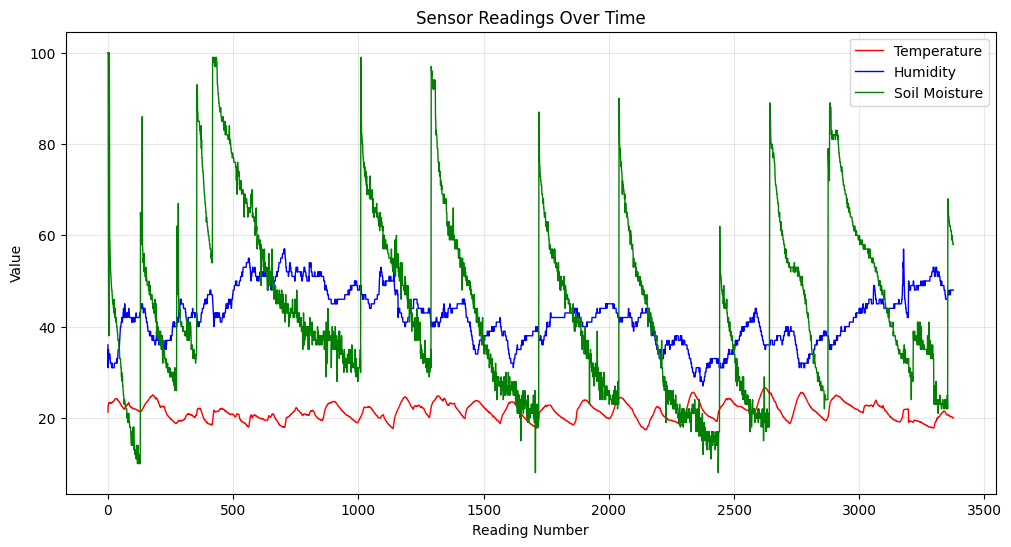

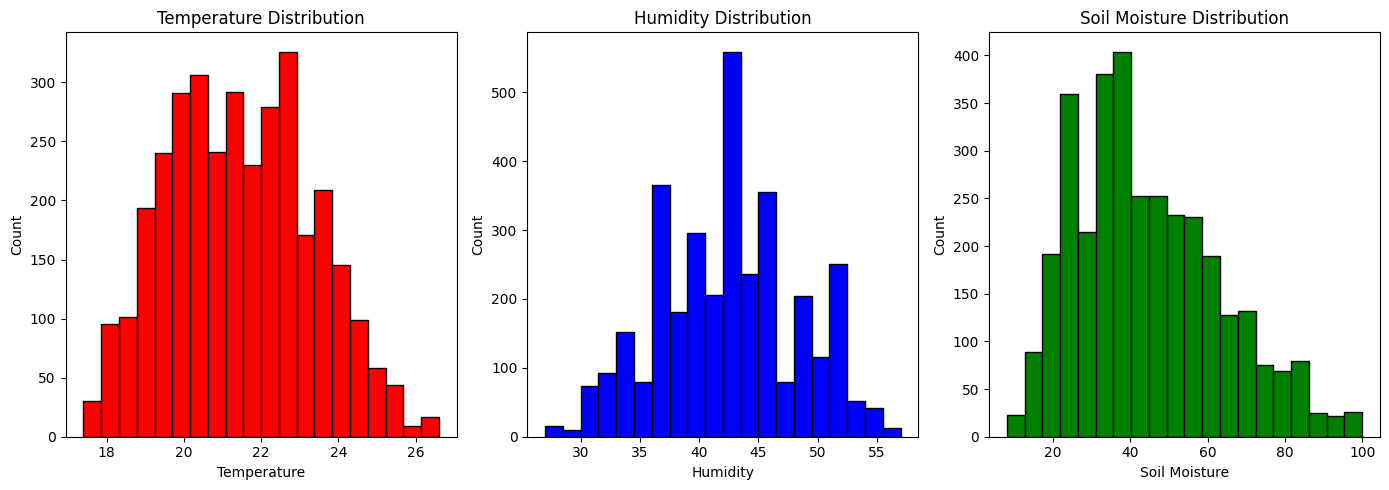

In [1]:
from pyspark.sql import SparkSession
import requests
import json
import matplotlib.pyplot as plt

# Create Spark Session
spark = SparkSession.builder.appName("IoT Sensor MapReduce").getOrCreate()

# Load data from Google Drive
file_id = "1Gf2xSPfGmClp2Z1PbvBJ_mnSch_GbIR9"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

response = requests.get(download_url)
data = response.json()

# Create RDD from JSON data
rdd = spark.sparkContext.parallelize(data)

# Extract sensor parameters from each record
def extract_temperature(record):
    value_json = json.loads(record['value'])
    return value_json.get('temperature')

def extract_humidity(record):
    value_json = json.loads(record['value'])
    return value_json.get('humidity')

def extract_soil(record):
    value_json = json.loads(record['value'])
    return value_json.get('soil')

print("\n" + "="*100)
print("=== Question number 1 ===")
print("="*100)

# Temperature MapReduce
print("\n" + "="*50)
print("=== Temperature Analysis ===")
print("="*50)

temp_rdd = rdd.map(extract_temperature).filter(lambda x: x is not None)

# Map step
temp_pairs = temp_rdd.map(lambda value: (value, 1))

# Reduce step: count frequency of each value
temp_frequency = temp_pairs.reduceByKey(lambda a, b: a + b)

# Find max and min by frequency
temp_freq_sorted = temp_frequency.sortBy(lambda x: x[1], ascending=False)
max_freq_temp = temp_freq_sorted.first()
min_freq_temp = temp_freq_sorted.sortBy(lambda x: x[1], ascending=True).first()

print(f"Most frequent temperature: {max_freq_temp[0]} (appeared {max_freq_temp[1]} times)")
print(f"Least frequent temperature: {min_freq_temp[0]} (appeared {min_freq_temp[1]} times)")

# Humidity MapReduce
print("\n" + "="*50)
print("=== Humidity Analysis ===")
print("="*50)

humidity_rdd = rdd.map(extract_humidity).filter(lambda x: x is not None)

# Map step
humidity_pairs = humidity_rdd.map(lambda value: (value, 1))

# Reduce step: count frequency of each value
humidity_frequency = humidity_pairs.reduceByKey(lambda a, b: a + b)

# Find max and min by frequency
humidity_freq_sorted = humidity_frequency.sortBy(lambda x: x[1], ascending=False)
max_freq_humidity = humidity_freq_sorted.first()
min_freq_humidity = humidity_freq_sorted.sortBy(lambda x: x[1], ascending=True).first()

print(f"Most frequent humidity: {max_freq_humidity[0]} (appeared {max_freq_humidity[1]} times)")
print(f"Least frequent humidity: {min_freq_humidity[0]} (appeared {min_freq_humidity[1]} times)")

# Soil MapReduce
print("\n" + "="*50)
print("=== Soil Analysis ===")
print("="*50)

soil_rdd = rdd.map(extract_soil).filter(lambda x: x is not None)

# Map step
soil_pairs = soil_rdd.map(lambda value: (value, 1))

# Reduce step: count frequency of each value
soil_frequency = soil_pairs.reduceByKey(lambda a, b: a + b)

# Find max and min by frequency
soil_freq_sorted = soil_frequency.sortBy(lambda x: x[1], ascending=False)
max_freq_soil = soil_freq_sorted.first()
min_freq_soil = soil_freq_sorted.sortBy(lambda x: x[1], ascending=True).first()

print(f"Most frequent soil: {max_freq_soil[0]} (appeared {max_freq_soil[1]} times)")
print(f"Least frequent soil: {min_freq_soil[0]} (appeared {min_freq_soil[1]} times)")

print("\n" + "="*100)
print("=== Question number 2 ===")
print("="*100)

# Collect data for plotting
temp_values = temp_rdd.collect()
humidity_values = humidity_rdd.collect()
soil_values = soil_rdd.collect()

# Graph 1: Line plot comparing all sensors
plt.figure(figsize=(12, 6))
plt.plot(temp_values, label='Temperature', color='red', linewidth=1)
plt.plot(humidity_values, label='Humidity', color='blue', linewidth=1)
plt.plot(soil_values, label='Soil Moisture', color='green', linewidth=1)

plt.title('Sensor Readings Over Time')
plt.xlabel('Reading Number')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Graph 2: Histograms showing value distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.hist(temp_values, bins=20, color='red', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(humidity_values, bins=20, color='blue', edgecolor='black')
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(soil_values, bins=20, color='green', edgecolor='black')
plt.title('Soil Moisture Distribution')
plt.xlabel('Soil Moisture')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Stop Spark Session
spark.stop()